<a href="https://colab.research.google.com/github/kiran-pyt/Pytorch-Parctise/blob/main/Pytorch_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.optim import SGD
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
device

device(type='cpu')

In [34]:
import random

# Generate random 2D list for x
x = [[random.randint(1, 10) for _ in range(2)] for _ in range(4)]

# Generate random 2D list for y
y = [[random.randint(1, 20)] for _ in range(4)]

print("Random x:", x)
print("Random y:", y)



Random x: [[4, 5], [9, 9], [4, 9], [9, 5]]
Random y: [[15], [15], [11], [19]]


In [35]:
X=torch.tensor(x,dtype=torch.float32)
Y=torch.tensor(y,dtype=torch.float32)

In [36]:
X.shape

torch.Size([4, 2])

In [37]:
X

tensor([[4., 5.],
        [9., 9.],
        [4., 9.],
        [9., 5.]])

In [38]:
Y.shape

torch.Size([4, 1])

In [39]:
Y

tensor([[15.],
        [15.],
        [11.],
        [19.]])

In [40]:
X=X.to(device)
Y=Y.to(device)

In [41]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):#def __init__(self,input_size,output_size)
        super(MyNeuralNetwork,self).__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)
    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x


In [42]:
mynet=MyNeuralNetwork().to(device)

In [43]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.2771,  0.5842],
        [-0.5398,  0.5311],
        [-0.6138,  0.1106],
        [ 0.1079, -0.0635],
        [-0.2181, -0.4381],
        [-0.5723, -0.3754],
        [-0.4691,  0.0307],
        [ 0.1826,  0.6947]], requires_grad=True)

In [44]:
mynet.parameters()

<generator object Module.parameters at 0x7a9cbf04fae0>

In [45]:
for par in mynet.parameters():
 print(par)

Parameter containing:
tensor([[-0.2771,  0.5842],
        [-0.5398,  0.5311],
        [-0.6138,  0.1106],
        [ 0.1079, -0.0635],
        [-0.2181, -0.4381],
        [-0.5723, -0.3754],
        [-0.4691,  0.0307],
        [ 0.1826,  0.6947]], requires_grad=True)
Parameter containing:
tensor([-0.1527,  0.3369,  0.4293, -0.0011,  0.4675, -0.2099,  0.3302,  0.2274],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0042, -0.1382,  0.0350,  0.1907, -0.2669,  0.0804,  0.3399, -0.2627]],
       requires_grad=True)
Parameter containing:
tensor([-0.1761], requires_grad=True)


In [46]:
Loss=nn.MSELoss()
opti=SGD(mynet.parameters(),lr=0.01)


In [47]:
loss_history=[]
for _ in range(50):
  opti.zero_grad()
  pred=mynet(X)
  loss=Loss(pred,Y)
  loss.backward()
  opti.step()
  loss_history.append(loss.item())

In [48]:
loss_history

[291.83123779296875,
 152.3073272705078,
 530.6439819335938,
 233.85443115234375,
 224.91058349609375,
 216.32093811035156,
 208.07144165039062,
 200.14859008789062,
 192.5395050048828,
 185.23175048828125,
 178.21337890625,
 171.47291564941406,
 164.9993896484375,
 158.7822265625,
 152.81124877929688,
 147.07672119140625,
 141.56930541992188,
 136.27993774414062,
 131.20005798339844,
 126.32135009765625,
 121.63580322265625,
 117.13583374023438,
 112.81404876708984,
 108.66340637207031,
 104.6771469116211,
 100.84873962402344,
 97.17192077636719,
 93.64071655273438,
 90.24934387207031,
 86.99227905273438,
 83.86418151855469,
 80.8599624633789,
 77.97468566894531,
 75.20370483398438,
 72.54243469238281,
 69.98655700683594,
 67.53189086914062,
 65.17442321777344,
 62.910316467285156,
 60.735870361328125,
 58.64752960205078,
 56.64189147949219,
 54.715675354003906,
 52.86573028564453,
 51.08905029296875,
 49.382720947265625,
 47.74396514892578,
 46.17010498046875,
 44.6585693359375,
 43.

Text(0, 0.5, 'loss value')

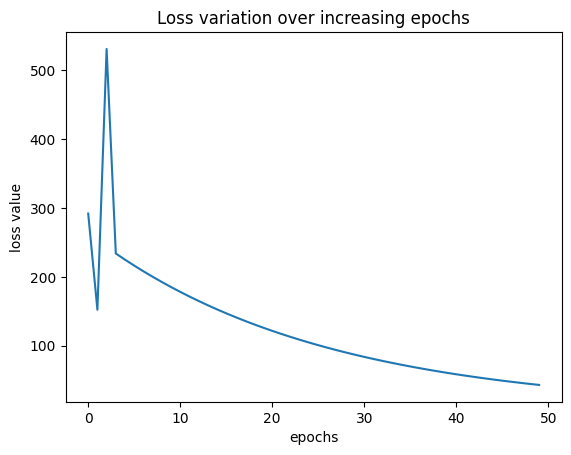

In [49]:
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')